In [85]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

"""
This is just going to make data to turn into audio.  sentence splitting can happen here i think.
"""

'\nThis is just going to make data to turn into audio.  sentence splitting can happen here i think.\n'

In [87]:
stops = set(stopwords.words('english'))
print(stops)

{'o', 'she', 'these', 'until', 's', 'can', 'does', 'the', 'yourselves', 'any', 'through', 'such', 'them', 'some', 'd', 'hadn', "needn't", 'myself', 'against', 'didn', "that'll", 'because', 'now', 'theirs', 'ain', 'hers', 'most', "should've", 'do', 'should', 'down', 'no', 'being', 'their', 'off', 'has', "mightn't", 'each', 'mustn', 'and', 'itself', 'y', 'herself', 'will', 'won', 'wouldn', 'or', 'to', 'what', "aren't", "you'd", "won't", 'shan', "wasn't", 'we', 'yourself', 'themselves', "hadn't", 'during', "shouldn't", 'whom', 'this', 'where', 'weren', 'was', 'his', 'doing', 'our', 'been', "isn't", 'here', 'him', 'same', 'after', 'wasn', 'too', 'if', 'her', 't', 'few', 'ours', 'have', 'on', 'yours', 'had', 'be', 'again', 'when', 'all', 'who', "you're", 'of', 'me', 'between', 'it', "hasn't", "haven't", 'my', 'himself', 'those', "you've", 'doesn', 'did', 'nor', 'both', 'hasn', 'into', 'above', 'more', 'am', 'm', "didn't", 'at', 'a', 'shouldn', 'why', 'by', 'own', 'but', 'isn', 'than', 'have

In [39]:
data = pd.read_csv('dota2_chat_messages.csv')

In [68]:
def maxscii(string):
    """
    returns true if the proportion of characters that are in [a-z] or [A-Z] are over cutoff
    """
    letter_ascii = [i for i in range(65,91)] + [i for i in range(97,123)]
    string_ascii = [ord(i) for i in str(string)]
    letter_list = [ 1 if i in letter_ascii else 0 for i in string_ascii]
    
    return float(sum(letter_list))/float(len(letter_list))

def english_stops(string):
    

In [69]:
data['maxscii'] = data.apply(lambda x : maxscii(x['text']), axis =1)

In [73]:
data['len'] = data.apply(lambda x : len(str(x['text'])), axis =1)

array([[<AxesSubplot:title={'center':'maxscii'}>,
        <AxesSubplot:title={'center':'len'}>]], dtype=object)

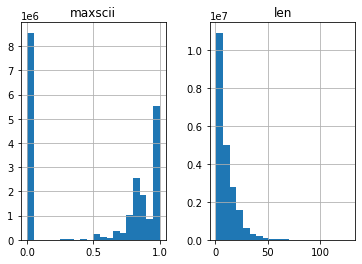

In [74]:
data[['maxscii','len']].hist(bins = 20) ## looks like above 0.8 will do nice

<AxesSubplot:xlabel='maxscii', ylabel='len'>

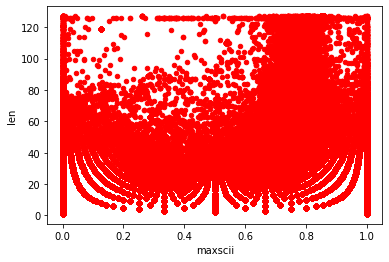

In [75]:
data.plot.scatter(x='maxscii',y='len',c='red')

In [82]:
good_data = data['text'].loc[data['maxscii']>0.8].loc[data['len']>20] ##this still has like, french and stuff
##also, we need to make sure there are some spaces.  no links..

In [91]:
good_data = good_data.apply(str.lower)

In [95]:
good_data[131].count(' ')/len(good_data[131])  ##this is space percent.  do this hist

0.14285714285714285